In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [2]:
col_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
            'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
            'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
            'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

df = pd.read_csv('imports-85.data.csv',
                 names = col_names, na_values = '?')
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [5]:
clean_data = df.dropna().copy()
messy_data = df[df.isnull().any(axis = 1)].copy()

In [6]:
le_make = LabelEncoder()
le_make.fit(df['make'])

LabelEncoder()

In [7]:
le_make.classes_

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [8]:
le_bstyle = LabelEncoder()
le_bstyle.fit(df['body-style'])

LabelEncoder()

In [9]:
le_bstyle.classes_

array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object)

In [10]:
clean_data['make'] = le_make.transform(clean_data['make'])
messy_data['make'] = le_make.transform(messy_data['make'])

In [11]:
clean_data['body-style'] = le_bstyle.transform(clean_data['body-style'])
messy_data['body-style'] = le_bstyle.transform(messy_data['body-style'])

In [12]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(clean_data[['make', 'body-style']], clean_data['num-of-doors'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
indx = df['num-of-doors'][df['num-of-doors'].isna()].index
indx

Int64Index([27, 63], dtype='int64')

In [14]:
for i, col in enumerate(df.columns):
    if col == 'num-of-doors':
        col_indx = i
col_indx

5

In [15]:
values = df.values

In [16]:
for i in indx:
    x1 = le_make.transform([df['make'].loc[i]]).ravel()[0]
    x2 = le_bstyle.transform([df['body-style'].loc[i]]).ravel()[0]
    values[i][col_indx] = tree_clf.predict([[x1, x2]])

In [17]:
pd.DataFrame(values, columns = col_names)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23,106,4800,26,27,22470


In [18]:
na_cols = df.isna().any(axis = 0)
na_cols

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [19]:
df.fillna(df.median(), inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-

In [21]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [22]:
cor_mat = df.corr()
cor_mat['price'].sort_values(ascending = False)

price                1.000000
engine-size          0.860343
curb-weight          0.819817
horsepower           0.749919
width                0.724558
length               0.686567
wheel-base           0.584847
bore                 0.532861
height               0.140439
normalized-losses    0.095489
stroke               0.083627
compression-ratio    0.072890
symboling           -0.080149
peak-rpm            -0.107283
city-mpg            -0.668822
highway-mpg         -0.693037
Name: price, dtype: float64

(array([2., 0., 0., 2., 4., 0., 0., 2., 4., 2.]),
 array([-0.6930373 , -0.52373357, -0.35442984, -0.18512611, -0.01582238,
         0.15348135,  0.32278508,  0.49208881,  0.66139254,  0.83069627,
         1.        ]),
 <a list of 10 Patch objects>)

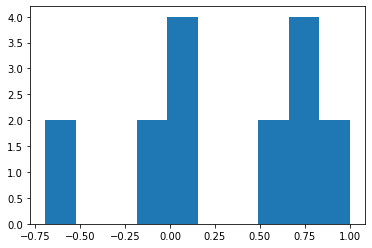

In [23]:
plt.hist(cor_mat['price'])

In [24]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231592A8B38>,
      dtype=object)

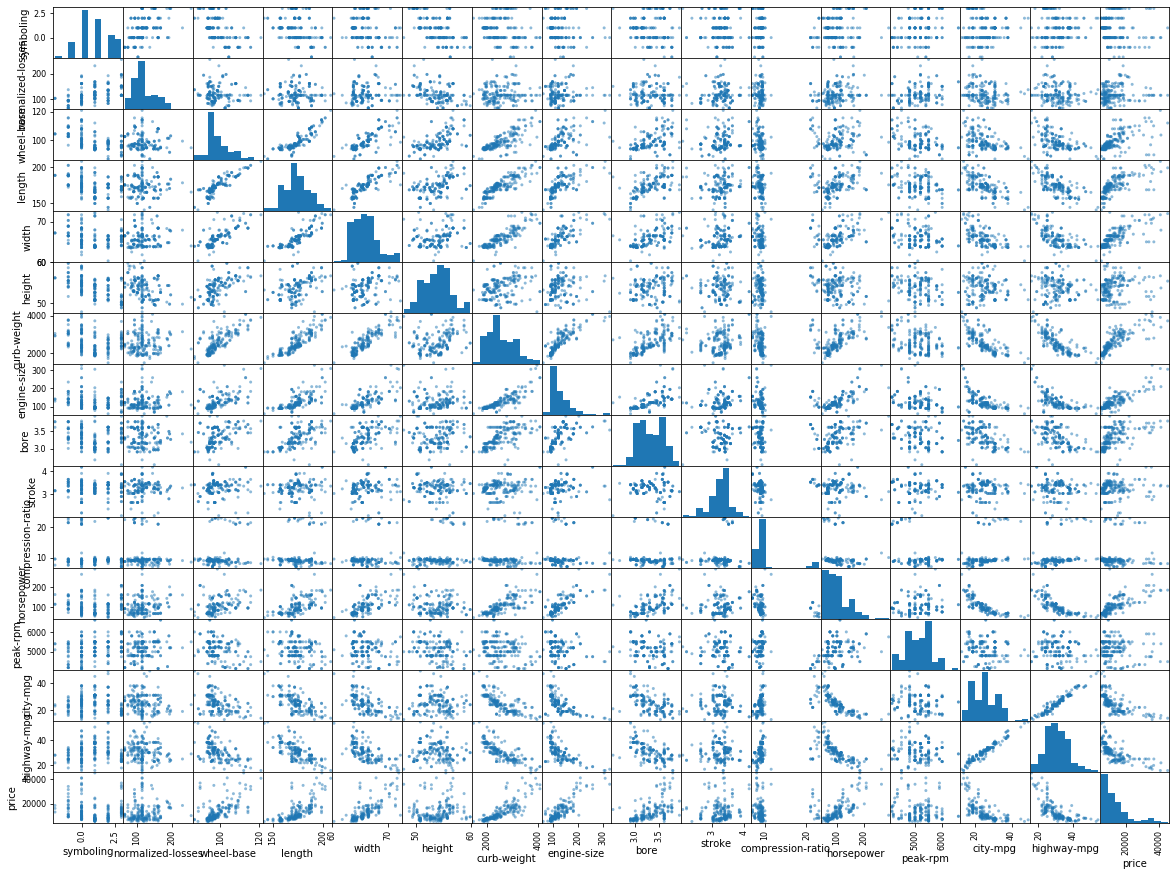

In [25]:
scatter_matrix(df, figsize = (20, 15))

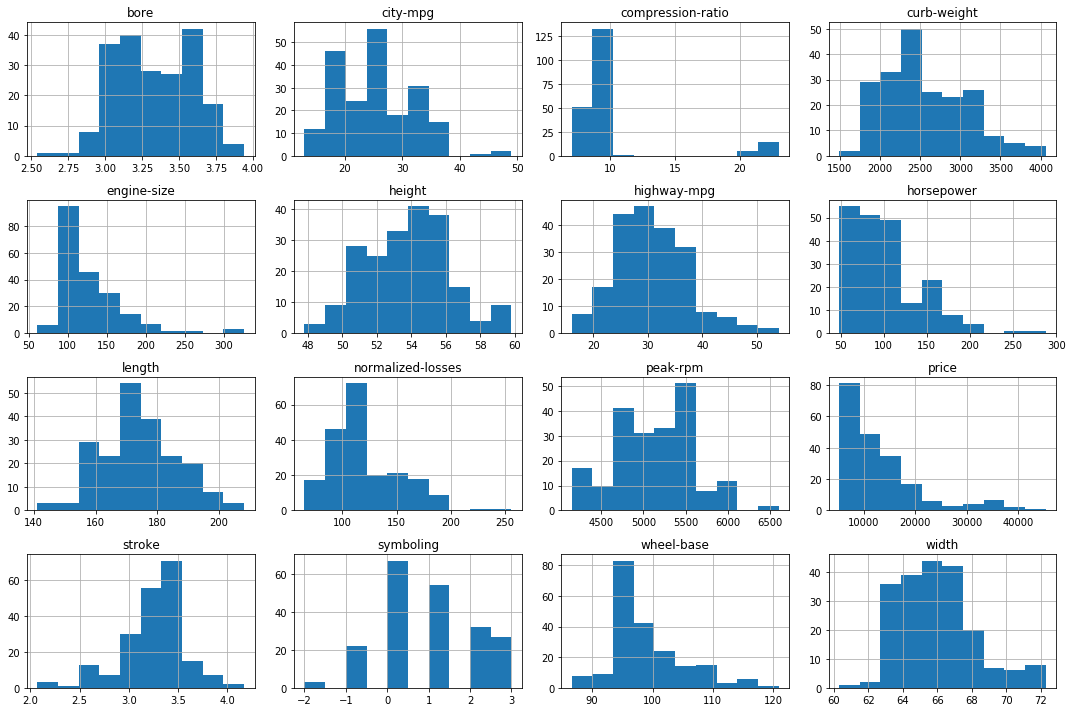

In [26]:
df.hist(figsize = (15, 10))
plt.tight_layout()

In [27]:
for col in list(df):
    if df[col].dtype != 'O':
        continue
    le = LabelEncoder()
    vals = df[col].values.ravel()
    df[col] = le.fit_transform(list(vals))

df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,0,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,115.0,1,1,0,2,3,1,0,99.8,...,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,1,1,0,0,3,1,0,105.8,...,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,115.0,1,1,0,0,4,1,0,105.8,...,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,1,1,1,0,3,1,0,105.8,...,131,5,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,115.0,1,1,1,2,2,0,0,99.5,...,131,5,3.13,3.40,7.0,160.0,5500.0,16,22,10295.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null int64
fuel-type            205 non-null int64
aspiration           205 non-null int64
num-of-doors         205 non-null int64
body-style           205 non-null int64
drive-wheels         205 non-null int64
engine-location      205 non-null int64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null int64
num-of-cylinders     205 non-null int64
engine-size          205 non-null int64
fuel-system          205 non-null int64
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-null float

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [30]:
X = df.drop('price', axis = 1)
y = df['price'].copy()

std_scale = StandardScaler()
X_scale = std_scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_scale_train, X_scale_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.3)

## Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lin_reg.score(X_test, y_test)

-0.38831733002171887

In [34]:
lin_reg = LinearRegression()

grid_model = GridSearchCV(lin_reg, param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}, cv = 3)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
grid_model.score(X_test, y_test)

-0.38831733002174795

In [36]:
grid_model.best_params_

{'fit_intercept': True, 'normalize': True}

In [37]:
lin_reg = LinearRegression(**grid_model.best_params_)

scores = cross_val_score(lin_reg, X, y, cv = 5)
print(scores)
print(scores.mean())

[ 0.69239941  0.77680328 -0.48908468  0.2346854   0.64109066]
0.37117881288164717


In [47]:
lin_reg = LinearRegression(**grid_model.best_params_)
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [48]:
lin_reg.score(X_test, y_test)

-0.38831733002174795

In [40]:
lin_reg_scale = LinearRegression(**grid_model.best_params_)
lin_reg_scale.fit(X_scale_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [41]:
lin_reg_scale.score(X_scale_test, y_test)

0.8607393904110315

## SGDRegressor

In [42]:
from sklearn.linear_model import SGDRegressor

In [53]:
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [54]:
sgd_reg.score(X_test, y_test)

-2.5126755090888043e+23

In [62]:
sgd_reg = SGDRegressor()

grid_model = GridSearchCV(sgd_reg, param_grid = {'alpha': [0.1, 0.001, 0.0001, 0.00001], 'tol': [0.1, 0.01, 0.001, 0.0001],
                                                'l1_ratio': [0.1, 0.15, 0.3, 0.5]}, cv = 3)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.001, 0.0001, 1e-05],
                         'l1_ratio': [0.1, 0.15, 0.3, 0.5],
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, retur

In [63]:
grid_model.score(X_test, y_test)

-2.2336582746852204e+25

In [64]:
grid_model.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.3, 'tol': 0.1}

In [ ]:
sgd_scale

## Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)

In [ ]:
svr.score(X_test, y_test)

In [ ]:
svr = SVR()

grid_model = GridSearchCV(svr, param_grid = {'C': [5, 10, 15, 20], 'degreee': [1, 2, 3, 4], 'coef0': [-1, -0.5, 0, 0.5, 1],
                                            'tol': []})